<a href="https://colab.research.google.com/github/changsin/AI/blob/main/09.deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks

Neural networks are built on top of the simple perceptrons that we studied already. However, there are two addtions that deep neural networks differ:

1. Hidden layers: In a perceptron, the input layer is connected to the output layer directly, but in a deep neural network, there are one or more layers in between. They are called "hidden" layers because you cannot see their inputs and outputs directly.

2. Non-linear activation functions: One of the biggest limitation of perceptron is that it cannot handle non-linear data: e.g., XOR (exclusive or) problem. In a deep neural network, a non-linear function is applied to determine the output. There are many different activation functions: Sigmoid, Tanh, ReLU, etc. ReLU is the most popular activation function used these days.



## Calculations in neural networks
Calculating values in a deep neural network works similar to perceptrons. The basic formula is:

$$ H = WX + b $$
- X: inputs
- W: weights
- b: bias

The data is fed to the input layer and passes through each layers using the above formula all the way to the final layer. What is different from perceptron is that after the values are calculated for the next layer, they are then passed through an activation function which decides what the resulting value should be. Non-linear functions like sigmoid, tanh, and relu are used depending on one's purpose.


## Activation functions
### Sigmoid

$$ f(x) = \frac{1}{1 + e^{-x}} $$

## ReLU

$$ f(x) = max(0, x) $$

## Tanh

$$ f(x) = tanh(x) $$

## Softmax
$$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $$

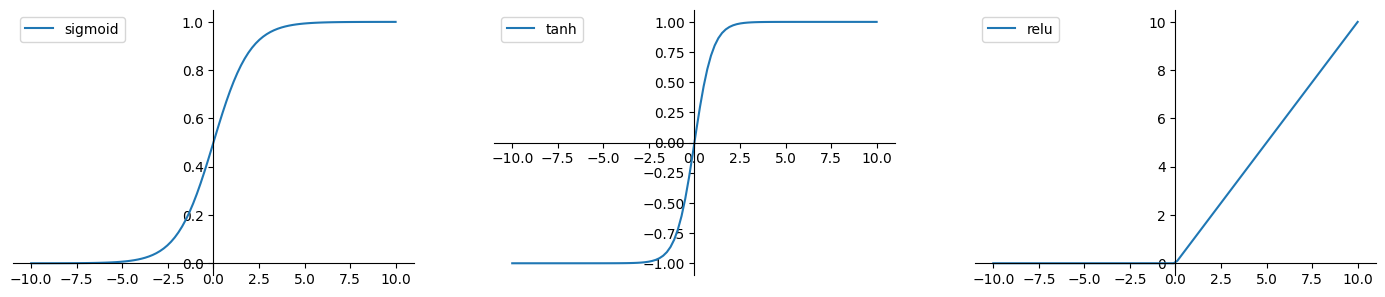

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(X):
  return [max(0.0, x) for x in X]

def tanh(x):
  return np.tanh(x)

# Softmax function definition
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # subtract max for numerical stability
    return exp_z / exp_z.sum(axis=0)

fig = plt.figure(figsize=(30,20))

def plot_centered_graph(x, y, pos, label):
  ax = fig.add_subplot(5, 5, pos)
  ax.plot(x, y, label=label)
  ax.spines['left'].set_position('center')
  ax.spines['bottom'].set_position(('data', 0))
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.legend()

x = np.linspace(-10, 10, 100)
plot_centered_graph(x, sigmoid(x), 1, 'sigmoid')
plot_centered_graph(x, np.tanh(x), 2, 'tanh')
plot_centered_graph(x, relu(x), 3, 'relu')

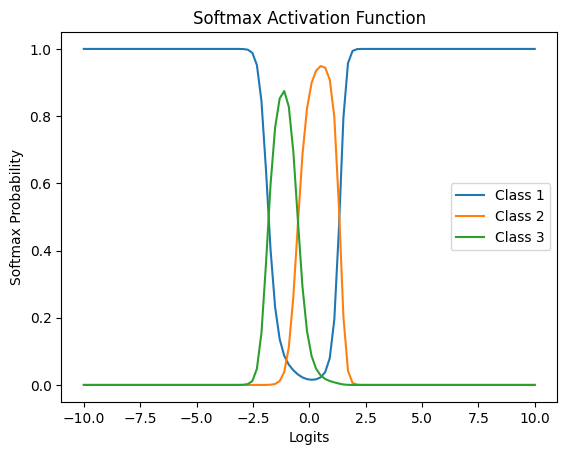

In [6]:
# Softmax function definition
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # subtract max for numerical stability
    return exp_z / exp_z.sum(axis=0)

# Generate a range of logits (inputs to softmax)
logits = np.linspace(-10, 10, 100)


# # Define logits as a function of input x for 3 classes
# # Let's assume the logits are linear functions of x with different slopes
# logits_class1 = x
# logits_class2 = x + 2
# logits_class3 = x - 2

# Define logits as a function of input x for 3 classes
# Using different non-linear functions of x
logits_class1 = 2 * x**2 + 3 * x + 1  # Quadratic function
logits_class2 = -1 * x**2 + 4 * x + 5  # Inverted quadratic
logits_class3 = 0.5 * x + 3            # Linear function


# Stack the logits into a matrix (3 classes)
logits = np.vstack([logits_class1, logits_class2, logits_class3])

# Apply softmax to each set of logits (for every value of x)
softmax_probs = softmax(logits)

# Plot the softmax probabilities for each class
plt.plot(x, softmax_probs[0], label='Class 1')
plt.plot(x, softmax_probs[1], label='Class 2')
plt.plot(x, softmax_probs[2], label='Class 3')

# # Assume we're dealing with 3 classes, and create 3 sets of logits
# logits_set = np.vstack([logits, logits + 2, logits - 2])

# # Apply softmax function to each set of logits
# softmax_probs = softmax(logits_set)

# # Plot the softmax probabilities for each class
# plt.plot(logits, softmax_probs[0], label='Class 1')
# plt.plot(logits, softmax_probs[1], label='Class 2')
# plt.plot(logits, softmax_probs[2], label='Class 3')

# Add labels and legend
plt.xlabel('Logits')
plt.ylabel('Softmax Probability')
plt.title('Softmax Activation Function')
plt.legend()

# Show the plot
plt.show()

In [ ]:
import numpy as np

X = np.array([[1],
              [0]])
W1 = np.array([[1, 1, 1],
              [1, 1, 1]])
W2 = np.array([[1],
               [1],
               [1]])

H = np.dot(X.T, W1)
np.dot(H, W2)

array([[3]])

In [ ]:
  def forward_pass(X, W1, W2, activate_fn):
    # input to the activation function
    z1 = np.dot(X.T, W1)
    a1 = activate_fn(z1)

    # hidden to output layer
    z2 = np.dot(a1, W2)
    a2 = activate_fn(z2)
    return z2

In [ ]:
forward_pass(X, W1, W2)

array([[3]])